# Airbnb Distribution Pattern in Beijing, China

#### Programming Tools for Urban Analytics, Univeristy of Glasgow

##### 01.04.2021


## Content


        1. Introduction
        2. Dateset
        3. Data cleaning
          3.1 Missing Value
          3.2 Change data type
          3.3 Outliers
        4. Feature Engineering
          4.1 Text to dummy variables
          4.2 Dimensionality reduction
        5. Analytics
          5.1 Distribution of price and location
          5.2 Feature relationshap
          5.3 Cluster Analytics
        6. Evaluation
        7. Conclusion

## 1. Introduction

In recent years, the sharing economy has flourished. In terms of travel and accommodation, one of the world's major sharing platforms is Airbnb. It brings opportunities to cities, choices for landlords and tourists, and has a significant impact on local housing, transportation, and economy.


There are many studies on the spatial pattern of Airbnb in large cities. The study results show that Airbnb listings' location mainly depends on the supply of vacant or second-hand housing, the distribution of traditional tourist accommodation, coastal areas, and the level of international tourism demand (Adamiak, Szyda, Dubownik and García-Álvarez, 2019). Moreover, its high penetration areas are occupied by the "talented and creative" group (usually downtown)(Quattrone et al., 2018). Compared with the hotel distribution, Airbnb usually occupies a different space (Gutiérrez, García-Palomares, Romanillos and Salas-Olmedo, 2017).

K-means is an unsupervised learning method. It combines similar data points and discovers potential patterns. Then spatial pattern can be analyzed if there are geo-referencing. For example, classify Neighbourhoods by Level of Access to many stores and find problematic Areas (Gould, Apparicio and Cloutier, 2012). According to the volume and intensity parameters, classify the physical activity of young, middle-aged, and elderly people in the city (Laudani et al., 2013). And analyze Country Clusters in European and OECD Area Public Policy (Castles and Obinger, 2008).

The purpose of this research is to explore the distribution of Airbnb houses with different characteristics in Beijing. The factors selected in this study that affect the house's characteristics include price, popularity, number of bedrooms, and house facilities. The research will analyze
      

> The relationship between housing prices and the distribution of houses

> The relationship between factors affecting house characteristics

> Cluster analysis of houses of different characteristic groups
 


## 2. Dataset

In the research, the data was obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html). The website publishes Airbnb listing data in multiple cities. The data set consists of several csv files and geojson files, each of which captures information about the list. For analysis, Two files (detailed list file and a neighborhood file that represents a district map.) have been used.

In [ ]:
!pip install contextily
!pip install -U -q PyDrive
!pip install geopandas
!pip install mapclassify

In [264]:
# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import seaborn as sns
import bokeh
import geopandas
import pandas as pd
import numpy as np
import os
import io
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
import folium

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1v029vZQh6lO27B0so54mSffGXsCt_UHG/view?usp=sharing' # The shareable link

downloaded = drive.CreateFile({'id':'1v029vZQh6lO27B0so54mSffGXsCt_UHG'}) 
downloaded.GetContentFile('Detailed_Listings_data_for_Beijing.csv')
df=pd.read_csv('Detailed_Listings_data_for_Beijing.csv')
#Set the display properties to inspect the data
pd.set_option("display.max_columns", 74)
nbhoods = geopandas.read_file("neighbourhoods.geojson")

In [265]:
df.head()

id                          listing_url       scrape_id last_scraped  \
0  114384  https://www.airbnb.com/rooms/114384  20210222161057   2021-02-24   
1  114465  https://www.airbnb.com/rooms/114465  20210222161057   2021-02-26   
2  627240  https://www.airbnb.com/rooms/627240  20210222161057   2021-02-23   
3  685820  https://www.airbnb.com/rooms/685820  20210222161057   2021-02-24   
4  824570  https://www.airbnb.com/rooms/824570  20210222161057   2021-02-26   

                                             name  \
0  CBD Luxury 1-bedroom suite with a 30m2 terrace   
1       国贸CBD中国尊梵悦108附近豪华总统套房睡3人/步行五分钟至地铁站万达广场沃尔玛   
2               Culturally Inspired @ City Center   
3                Huaxia Sunshine Serviced Apt (A)   
4                Huaxia Sunshine Serviced Apt (C)   

                                         description  \
0  Located in the core position of Chaoyang CBD. ...   
1  中式装修搭配具有年代感的古董家具，<br />尽显东方美韵的同时又不失现代时尚。<br />...   
2  <b>The space</b><br />As you can see from the ...   
3  Extended stay self-catering studio apartments ...   
4  Extended stay self-catering studio apartments ...   

                               neighborhood_overview  \
0                                                NaN   
1  Walking distance to dozens of bus lines, Guoma...   
2                                                NaN   
3  街区周边交通便利，临近地铁7号线大郊亭站，小区门口有多条公交路线，满足您的出行需求~<br ...   
4  街区周边交通便利，临近地铁7号线大郊亭站，小区门口有多条公交路线，满足您的出行需求~<br ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/ab6e7489-562e...   533062   
1  https://a0.muscache.com/pictures/miso/Hosting-...   533062   
2  https://a0.muscache.com/pictures/8814001/0f63a...  3113849   
3  https://a0.muscache.com/pictures/11670213/3bc6...  3488642   
4  https://a0.muscache.com/pictures/1bd7b3e2-2237...  3488642   

                                    host_url       host_name  host_since  \
0   https://www.airbnb.com/users/show/533062  Warner Beijing  2011-04-25   
1   https://www.airbnb.com/users/show/533062  Warner Beijing  2011-04-25   
2  https://www.airbnb.com/users/show/3113849              Bo  2012-07-31   
3  https://www.airbnb.com/users/show/3488642          Chunyu  2012-09-06   
4  https://www.airbnb.com/users/show/3488642          Chunyu  2012-09-06   

             host_location                                         host_about  \
0   Binhai, Tianjin, China  Currently working in China running Warner Inte...   
1   Binhai, Tianjin, China  Currently working in China running Warner Inte...   
2  Beijing, Beijing, China  Multi-lingual, structural and creative. Workin...   
3  Beijing, Beijing, China  Hi Everyone, this is Amy! I'm really happy to ...   
4  Beijing, Beijing, China  Hi Everyone, this is Amy! I'm really happy to ...   

   host_response_time host_response_rate host_acceptance_rate  \
0      within an hour                86%                 100%   
1      within an hour                86%                 100%   
2                 NaN                NaN                   0%   
3  a few days or more                 0%                  50%   
4  a few days or more                 0%                  50%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/pictures/user/b612c...   
1                 f  https://a0.muscache.com/im/pictures/user/b612c...   
2                 f  https://a0.muscache.com/im/users/3113849/profi...   
3                 f  https://a0.muscache.com/im/pictures/user/95a9b...   
4                 f  https://a0.muscache.com/im/pictures/user/95a9b...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/b612c...                ITC   
1  https://a0.muscache.com/im/pictures/user/b612c...                ITC   
2  https://a0.muscache.com/im/users/3113849/profi...                NaN   
3  https://a0.muscache.com/im/pictures/user/95a9b...           Chaoy

The Detailed listings contain 74 different features for 24977 Airbnb locations. Choose the feature related to the study. They are id, name, latitude, longitude, room type, bathrooms, bedrooms, amenities, district, price, review number, review score.

In [266]:
df = df[['id',
        'name',
        'latitude',
        'longitude',
        'room_type',
        'bathrooms_text',
        'bedrooms',
        'amenities',
        'neighbourhood_cleansed',
        'price',
        'number_of_reviews',
        'review_scores_rating'] ]
df.shape

(24977, 12)

According to the location map of Airbnb houses, it can be roughly seen that houses are mainly distributed in areas close to the city center, but there are very few houses in the center. Also, there are fewer houses in the suburbs, and there are a small number of concentrated distribution in Miyun District, Yanqing District, Fangshan District, and other districts with prominent tourist attractions.

Text(0.5, 1.0, 'Airbnb locations')

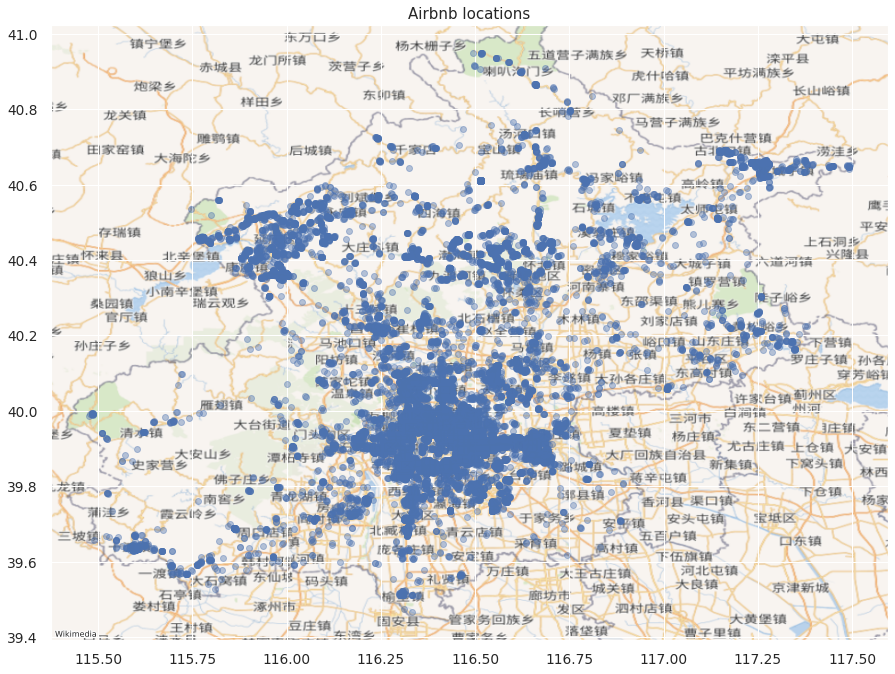

In [267]:
df_geo = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, 
                                                                            df.latitude))
df_geo.set_crs(epsg=4326, inplace=True)
ax = df_geo.plot(alpha=.4,figsize = (15,15))
import contextily as ctx
ctx.add_basemap(ax, crs="EPSG:4326",source=ctx.providers.Wikimedia)
ax.set_title('Airbnb locations')

## 3. Data cleaning

The purpose of this stage is to clean up the data. Strategies for data cleaning include:
*   Find and drop missing values
*   Convert the column to the correct data form
*   Remove Outliers






#### 3.1 Missing Value

Calculate the missing value statistics.

In [268]:
def missing_statistics(df):
    '''
        Calculates missing value statistics for a given dataframe and
        returns a dataframe containing number of missing values per column
        and the percentage of values missing per column.
        arguments:
            df: the dataframe for which missing values need to be calculated.
    '''
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    missing_stats['pct_missing'] = np.round(100 * (missing_stats['num_missing'] / df.shape[0]))
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)

    return missing_stats

In [269]:
num_missing = missing_statistics(df)
num_missing

num_missing  pct_missing
review_scores_rating          11924         48.0
bedrooms                        540          2.0
bathrooms_text                   54          0.0
name                              1          0.0
id                                0          0.0
latitude                          0          0.0
longitude                         0          0.0
room_type                         0          0.0
amenities                         0          0.0
neighbourhood_cleansed            0          0.0
price                             0          0.0
number_of_reviews                 0          0.0
geometry                          0          0.0

The primary missing value appears in the *veview_scores_rating* variable; that is, the house has not been rated. After extracting this part of observations and searching for observations on the Airbnb website, I found that this part of the data contains much wrong information, such as the number of wrong bathrooms, the number of bedrooms, and the price. Although not most houses that have not scored have inaccurate information, to be accurate, this study removed the observations with a missing value. After removal, there are 12,867 observations left in the dataset.

In [270]:
df = df.dropna()
df.shape

(12867, 13)

### 3.2 Change data type


In [271]:
df.dtypes

id                           int64
name                        object
latitude                   float64
longitude                  float64
room_type                   object
bathrooms_text              object
bedrooms                   float64
amenities                   object
neighbourhood_cleansed      object
price                       object
number_of_reviews            int64
review_scores_rating       float64
geometry                  geometry
dtype: object

Convert object types to categorical variables.

In [272]:
categorical_types = ['room_type','neighbourhood_cleansed']
df[categorical_types] = df[categorical_types].apply(lambda x: x.astype('category'),
                                                                                axis='rows')

The number of bathrooms in the data set is actually described in text format, and text needs to be converted into numbers.

In [273]:
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Half-bath','0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('half-bath','0.5')
df['bathrooms_text'] = df.bathrooms_text.apply(lambda x:re.sub(r'[,baths,bath,shared,Shared,Private,p]', '', x)).astype('float')

The value in *price* variable contains a dollar sign. Before proceeding with the analysis, the dollar sign needs to be removed. It should be noted that the price unit should be ¥.

In [274]:
df['price'] = df.price.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')

There are three types of room_type variables (Entire home/apt, Private room, Shared room), which measure the house's degree of privacy. According to the degree of privacy, the room_type is redefined as 2, 1, 0. It can be seen that most are the entire home, and there are very few shared rooms.

In [275]:
df.room_type.unique()

['Entire home/apt', 'Private room', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

Text(0.5, 1.0, 'Room type distribution')

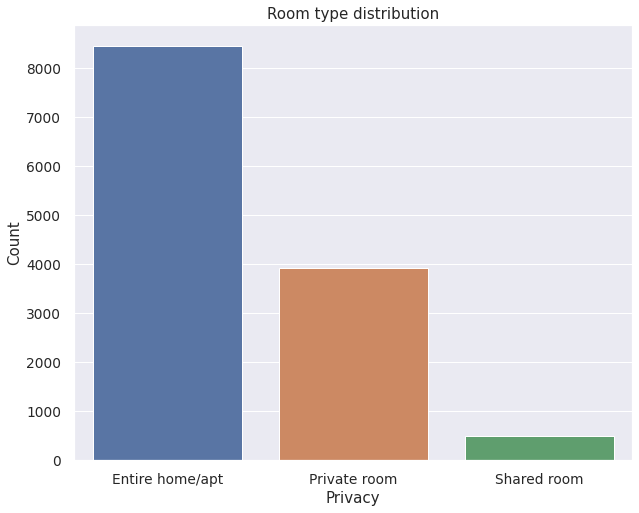

In [276]:
x = df.groupby('room_type').count()
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=x.index, y=x.id)
plt.xlabel('Privacy', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Room type distribution', fontsize=15)


In [277]:
df.room_type.cat.rename_categories({'Entire home/apt': 2,  'Private room': '1',
                                                    'Shared room':0, },inplace=True)
df.room_type = df.room_type.astype(int)

### 3.3 Outliers

According to the definition of Wikipedia


> In statistics, an outlier is an observation point that is distant from other observations.



In [278]:
df.describe()

id      latitude     longitude    room_type  bathrooms_text  \
count  1.286700e+04  12867.000000  12867.000000  12867.00000    12867.000000   
mean   3.356584e+07     40.049036    116.456911      1.62058        1.550556   
std    9.294004e+06      0.260727      0.294854      0.55714        1.597409   
min    1.143840e+05     39.475680    115.478560      0.00000        0.000000   
25%    2.801663e+07     39.896000    116.325060      1.00000        1.000000   
50%    3.517005e+07     39.945430    116.450160      2.00000        1.000000   
75%    4.003758e+07     40.122635    116.546075      2.00000        1.500000   
max    4.815320e+07     40.950180    117.493820      2.00000      101.500000   

           bedrooms         price  number_of_reviews  review_scores_rating  
count  12867.000000  12867.000000       12867.000000          12867.000000  
mean       1.734903    791.781456          10.672729             94.898655  
std        1.454816   2034.822596          19.523742             11.438179  
min        1.000000      0.000000           1.000000             20.000000  
25%        1.000000    258.000000           2.000000             95.000000  
50%        1.000000    386.000000           4.000000            100.000000  
75%        2.000000    647.000000          11.000000            100.000000  
max       19.000000  68980.000000         406.000000            100.000000

According to the figure below's price distribution, it can be found that many larger values may be outliers and need to be removed.

Text(0.5, 1.0, 'Distribution of price')

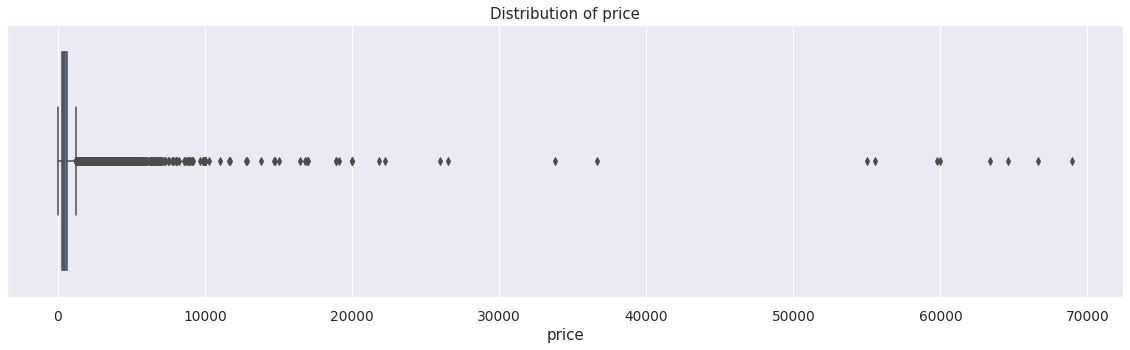

In [279]:
#Check the price distribution 
f, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x = df['price'])
plt.title('Distribution of price')

First, use Z-score to identify outliers. Wikipedia definition


> The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

When calculating the Z score, we rescale the data and center it, and look for data points that are too far from zero. These data points that are too far from zero will be considered outliers. In most cases, a 3 or -3 threshold is used; that is, if the Z score is greater than or less than 3 or -3, respectively, the data point will be identified as an outlier. After removing the outliers, the price distribution is shown in the figure below.



Text(0.5, 1.0, 'Distribution of price')

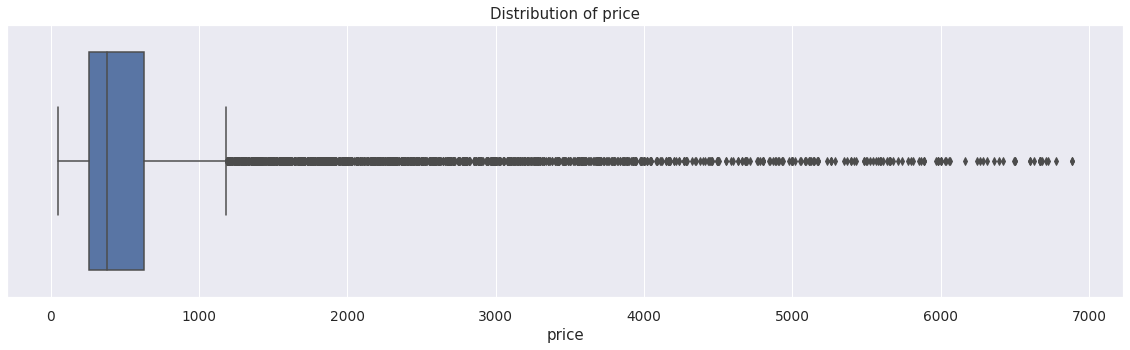

In [280]:
df.drop(df[df.price == 0].index, inplace=True)
from scipy import stats
df= df.loc[np.abs(stats.zscore(df.price)) < 3]
f, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x =df['price'])
plt.title('Distribution of price')

The figure below shows that the bathroom number may have larger outliers and is unreasonable.

Text(0.5, 1.0, 'Distribution of bathroom')

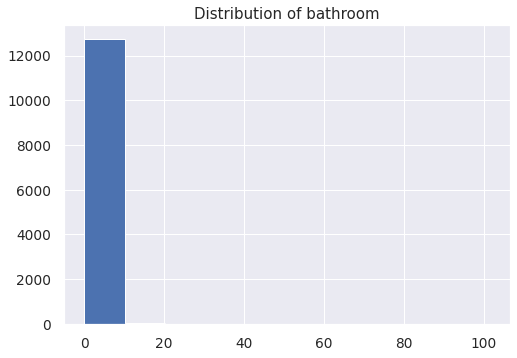

In [281]:
plt.hist(df['bathrooms_text'])
plt.title('Distribution of bathroom')

Also use Z-score to remove outliers.

Text(0.5, 1.0, 'Distribution of bathroom')

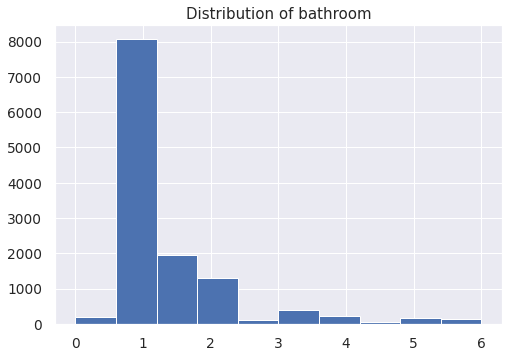

In [282]:
df= df.loc[np.abs(stats.zscore(df.bathrooms_text)) < 3]
plt.hist(df['bathrooms_text'])
plt.title('Distribution of bathroom')

In [283]:
df = df.reset_index()
df.shape

(12577, 14)

After removing outliers, the observation number dropped from 12867 to 12577, which had little effect.

## 4. Feature Engineering


### 4.1 Text to dummy variables

The *amenities* variable is a list-based column. We created a binary bag-of-words representation for it. The representation is a document-term-matrix with a 1 indicating the presence of amenity and 0 otherwise. Then normalize and vectorize the variable. In total, there are 165 unique amenities offered across all the 12763 airbnb listings in Beijing.

In [284]:
# remove the curly brackets
df['amenities'] =  df['amenities'].apply(lambda x: x[1:-1])
df.amenities.head()

0    "Wifi", "Carbon monoxide alarm", "Cable TV", "...
1    "Wifi", "Heating", "Shower gel", "Fire extingu...
2    "Breakfast", "Wifi", "Cable TV", "Heating", "L...
3    "Wifi", "Smart lock", "Paid parking on premise...
4    "Wifi", "Smart lock", "Paid parking on premise...
Name: amenities, dtype: object

In [285]:
amenities = df.amenities
# create a dictionary of terms
amenities_idx ={}
idx = 0
corpus = []
for i in range(len(amenities)):
    items = amenities[i]
    items_lower = items.lower()
    tokens = items_lower.split(',')
    corpus.append(tokens)
    for token in tokens:
        if token not in amenities_idx:
            amenities_idx[token] = idx
            idx += 1
# Get the number of items and tokens 
M = len(amenities)
N = len(amenities_idx)

# Initialize a matrix of zeros
A = np.zeros((M, N))

# Define the amenity_encoder function
def amenity_encoder(tokens):
    x = np.zeros(N)
    for token in tokens:
        # Get the index for each amenity
        idx = amenities_idx[token]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = amenity_encoder(tokens)
    i = i + 1
A.shape

(12577, 165)

In [286]:
amenities_features = pd.DataFrame(A, columns=list(amenities_idx.keys()))
amenities_features.head()

"wifi"   "carbon monoxide alarm"   "cable tv"   "shampoo"   "heating"  \
0     1.0                       1.0          1.0         1.0         1.0   
1     1.0                       1.0          1.0         1.0         1.0   
2     0.0                       0.0          1.0         0.0         1.0   
3     1.0                       0.0          1.0         1.0         1.0   
4     1.0                       0.0          1.0         1.0         1.0   

    "bed linens"   "long term stays allowed"   "tv"   "shower gel"  \
0            1.0                         1.0    1.0            1.0   
1            1.0                         1.0    1.0            1.0   
2            0.0                         1.0    1.0            0.0   
3            0.0                         1.0    1.0            0.0   
4            0.0                         1.0    1.0            0.0   

    "smoke alarm"   "hot water"   "hair dryer"   "hangers"  \
0             1.0           1.0            1.0         1.0   
1             1.0           1.0            1.0         1.0   
2             0.0           0.0            0.0         0.0   
3             0.0           0.0            1.0         1.0   
4             0.0           0.0            1.0         1.0   

    "ethernet connection"   "fire extinguisher"   "dedicated workspace"  \
0                     1.0                   1.0                     1.0   
1                     1.0                   1.0                     1.0   
2                     0.0                   0.0                     0.0   
3                     0.0                   1.0                     0.0   
4                     0.0                   1.0                     0.0   

    "kitchen"   "air conditioning"   "washer"   "elevator"   "essentials"  \
0         1.0                  1.0        1.0          1.0            0.0   
1         1.0                  1.0        1.0          1.0            1.0   
2         1.0                  1.0        1.0          0.0            1.0   
3         0.0                  1.0        1.0          1.0            1.0   
4         0.0                  1.0        1.0          1.0            1.0   

    "dishes and silverware"   "patio or balcony"  "breakfast"   "wifi"  \
0                       0.0                  0.0          0.0      0.0   
1                       1.0                  1.0          0.0      0.0   
2                       0.0                  0.0          1.0      1.0   
3                       0.0                  0.0          0.0      0.0   
4                       0.0                  0.0          0.0      0.0   

    "smart lock"   "paid parking on premises"   "refrigerator"  \
0            0.0                          0.0              0.0   
1            0.0                          0.0              0.0   
2            0.0                          0.0              0.0   
3            1.0                          1.0              1.0   
4            1.0                          1.0              1.0   

    "luggage dropoff allowed"   "microwave"   "stove"  "lock on bedroom door"  \
0                         0.0           0.0       0.0                     0.0   
1                         0.0           0.0       0.0                     0.0   
2                         0.0           0.0       0.0                     0.0   
3                         1.0           1.0       1.0                     0.0   
4                         1.0           1.0       0.0                     0.0   

    "free street parking"   "breakfast"   "hot tub"  \
0                     0.0           0.0         0.0   
1                     0.0           0.0         0.0   
2                     0.0           0.0         0.0   
3                     0.0           0.0         0.0   
4                     0.0           0.0         0.0   

    "free parking on premises"   "iron"  ...  "elevator"   "mini fridge"  \
0                          0.0      0.0  ...         0.0             0.0   
1                         

### 4.2 Dimensionality reduction

When using a data set with many features, it is difficult to visualize/explore the relationship between the features, and it will also affect the performance of the machine learning model. Therefore, dimensionality reduction is required. In machine learning, dimensionality reduction reduces the number of random variables considered by obtaining a set of principal variables. By reducing the feature space's dimensionality, the relationship between the features to be considered can be reduced. One way to perform dimensionality reduction is to use Principal Components Analysis (PCA).

PCA is a linear feature extraction technique. It performs a linear mapping of data to low-dimensional space to maximize the data's difference in the low-dimensional representation. It is achieved by calculating the eigenvectors from the covariance matrix. The eigenvector corresponding to the largest eigenvalue (principal component) is used to reconstruct a large part of the original data variance. PCA can delete the least essential features while still retaining the most valuable part of all features. These "main components" "It is defined as a weighted linear combination of existing features. Each new function or component created after PCA is independent of each other (AITCHISON, 1983).

Define the number of components as three here to facilitate 3D visualization. The figure below shows how much variance is explained by each PCA feature.

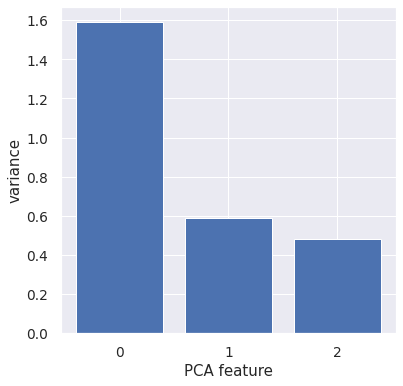

In [287]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(amenities_features)
features = range(pca.n_components_)
plt.figure(figsize=(6,6))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

Take component 1 as an example to check his makeup. The following figure shows that the first component's most valuable feature is refrigerator, dishes, and silverware, bed linens.

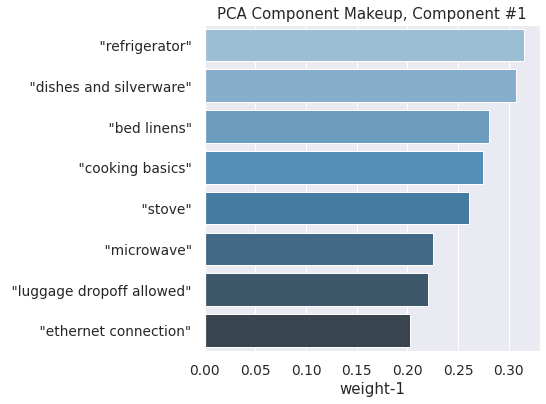

In [288]:
pca_features = pca.transform(amenities_features)
pca_df = pd.DataFrame(pca_features)
PC = pd.DataFrame(pca.components_,columns=amenities_features.columns,index = ['weight-1','weight-2','weight-3'])
PC_1 = PC.iloc[0:1,:]
PC_1 = PC_1.T
PC_1['abs_weights']=PC_1['weight-1'].apply(lambda x: np.abs(x))
sorted_PC_1 = PC_1.sort_values('abs_weights', ascending=False).head(8)
fig, ax1 = plt.subplots(figsize=(6,6))  
ax1=sns.barplot(data=sorted_PC_1, 
                   x="weight-1", 
                   y=sorted_PC_1.index, 
                   palette="Blues_d",
                   ax=ax1)
ax1.set_title("PCA Component Makeup, Component #" + str(1))
plt.show()

Using Airbnb listings in the Mentougou area and the three main components derived above, a 3D scatter plot of data points is created. Observe the distribution characteristics of amenity and the relationship between it and the price. From the 3d diagram below, the amenity feature is clustered and has a relationship with the price. The high price is mainly distributed in one area, and the low price is mainly distributed in another area. (Hover the mouse on the point representing Airbnb listing to see its detailed information)

In [2]:
import plotly.offline as py

autosize =False

df_name = df[['name','price','neighbourhood_cleansed','review_scores_rating']]
df_3d = pd.concat([df_name, pca_df], axis=1)
df_3d.shape
plotly_data = df_3d[(df_3d.neighbourhood_cleansed == "门头沟区 / Mentougou") ]
plotly_data.shape
bins = [0, 500, np.inf]
names = ['<500', '>500']
plotly_data['price'] = pd.cut(plotly_data['price'], bins, labels=names)
import plotly.express as px
fig = px.scatter_3d(plotly_data, x=0, y=1, z=2, color='price', 
                    hover_name='name', hover_data=['price','review_scores_rating'], 
                    template='plotly_dark', opacity=0.9, title='Visualizing Airbnb locations in amenity feature space',
                    labels={'0': 'X', '1': 'Y', '2':'Z'}, )

py.iplot(fig)


NameError: name 'df' is not defined

In [290]:
df = df.drop(['amenities'], axis=1)

In [291]:
df_all = pd.concat([df, pca_df], axis=1)

## 5. Analytics

### 5.1 Distribution of price and location


Now study the distribution of Airbnb location density and prices within the city.

In [292]:
df_price = df_all[['id','latitude','longitude','neighbourhood_cleansed','price']]
# construct a geodataframe
df_price_geo = geopandas.GeoDataFrame(df_price, geometry=geopandas.points_from_xy(df_price.longitude, 
                                                                            df_price.latitude))
df_price_geo = df_price_geo[['id','neighbourhood_cleansed','price','geometry']]
df_price_geo.set_crs(epsg=4326, inplace=True)

dist = df[['neighbourhood_cleansed','id']].set_index('neighbourhood_cleansed')
dist['neighbourhood'] = dist.index
dist = dist.rename(index={'东城区': 'Dongcheng','丰台区 / Fengtai':'Fengtai','大兴区 / Daxing':'Daxing','密云县 / Miyun':'Miyun',
                               '平谷区 / Pinggu':'Pinggu','延庆县 / Yanqing':'Yanqing','怀柔区 / Huairou':'Huairou','房山区':'Fangshan',
                               '昌平区':'Changping','朝阳区 / Chaoyang':'Chaoyangg','海淀区':'Haidian','石景山区':'Shijingshan',
                               '西城区':'Xichen','通州区 / Tongzhou':'Tongzhou','门头沟区 / Mentougou':'Mentougou','顺义区 / Shunyi':'Shunyi'})
dist['neighbourhood_en'] = dist.index
nbhoods = geopandas.read_file("neighbourhoods.geojson")
nbhoods = nbhoods.merge(dist, on='neighbourhood')
nbhoods['coords'] = nbhoods['geometry'].apply(lambda x: x.representative_point().coords[:])
nbhoods['coords'] = [coords[0] for coords in nbhoods['coords']]
df_price_geo_grouped = df_price_geo.groupby('neighbourhood_cleansed')[['price']].median()
cloropeth_price_df = pd.merge(nbhoods, df_price_geo_grouped , 
                              left_on='neighbourhood', right_index=True)

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:235: UserWarning:


/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:237: UserWarning:




Text(0.5, 1.0, 'Airbnb price distribution across neighbourhoods')

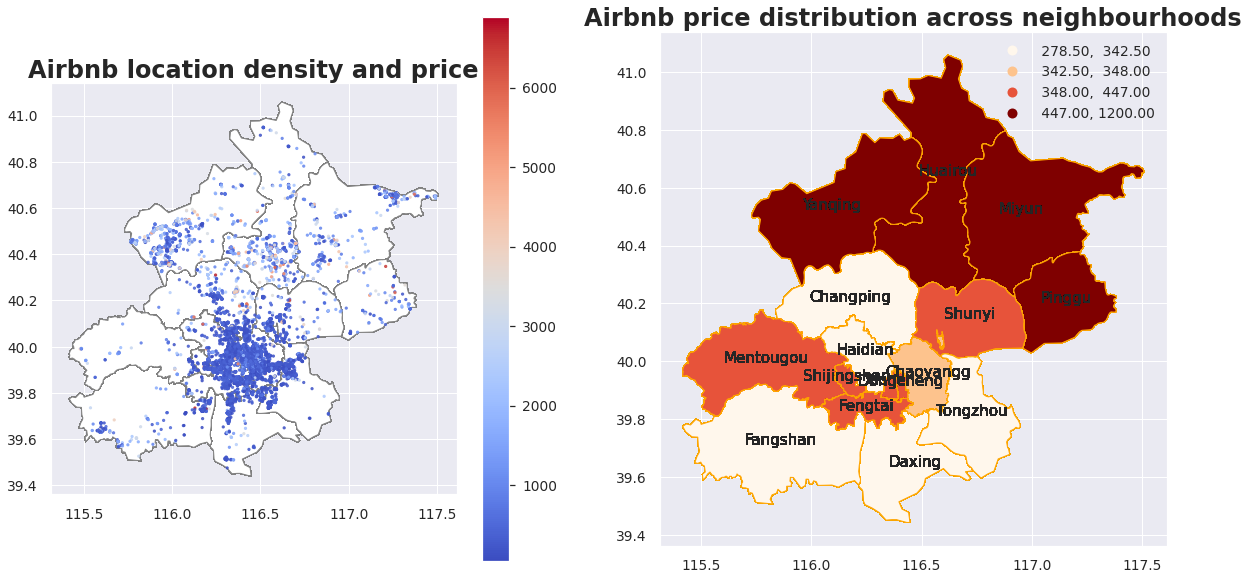

In [293]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,10)    
ax1 = nbhoods.plot(ax = ax1,color='white', edgecolor='grey')
ax1 = df_price_geo.plot(ax = ax1, 
                                  markersize=5,
                                  alpha = 0.8,
                                  legend=True,
                                  column='price', 
                                  cmap='coolwarm')
ax1.set_title("Airbnb location density and price", 
             fontsize=24, fontweight='bold')
             
ax2 = cloropeth_price_df.plot(ax=ax2, 
                              figsize=(6,6),
                                     column='price', 
                                     cmap='OrRd', 
                                     scheme='quantiles',
                                     edgecolor='orange',
                             legend=True)
for idx, row in nbhoods.iterrows():
    plt.annotate(s=row['neighbourhood_en'], xy=row['coords'],
                 horizontalalignment='center')
ax2.set_title("Airbnb price distribution across neighbourhoods", 
             fontsize=24, fontweight='bold')  

According to the above figure, although there are not many Airbnb locations in suburban areas such as Huairou, Yanqing, and Miyun, the price distribution is relatively scattered, but the areas with a high density of indoor Airbnb locations are mainly low prices. Further study the distribution of Airbnb prices in different districts. The areas with higher Airbnb prices are Huairou, Miyun, Yanqing, and the Dongchen and Xichen districts in the city center. The higher average price in the suburbs may be due to the large-scale houses used for group building and gatherings. The higher average price in the city center is the shortage of land resources and the abundance of other resources such as scenic hotels. This is consistent with the previous research results that the geographical location, especially the distance to the tourist area, has a great influence on the price(Perez-Sanchez, Serrano-Estrada, Marti and Mora-Garcia, 2018).

### 5.2 Feature relationshap

Below is the correlation matrix of the variables in the dataset. The highest correlation is between price and the number of bathrooms and bedrooms. The highest negative correlation is room type(privacy) and component 1 of amenity (mainly infected by wifi). 

In [294]:
df_k = df_all[['room_type','bathrooms_text','bedrooms','price','number_of_reviews', 'review_scores_rating',0,1,2]]
df_k = df_k.dropna()

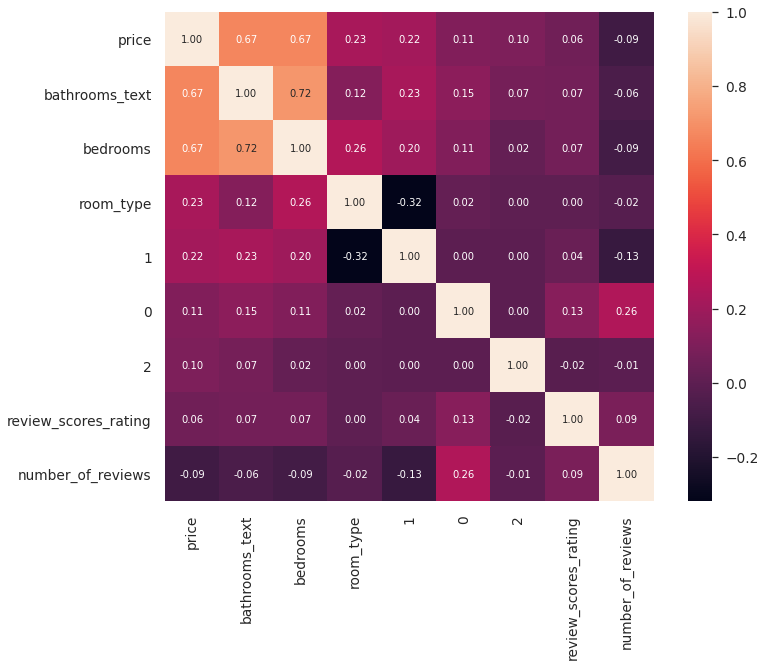

In [295]:
corrmat = df_k.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 13
cols = corrmat.nlargest(k, 'price')['price'].index 
cm = np.corrcoef(df_k[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 5.3 Cluster Analytics

Use K-means to find similar Airbnb listings in Beijing. Similar means similar price, amenity, popularity(* the number of reviews*), privacy(*room type*), and review score.


The goal of K-means is to group similar data points and discover potential patterns. To achieve this goal, K-means looks for a fixed number (k) of clusters in the data set. A cluster refers to a collection of data points clustered together due to some similarity. You will define the target number k, the number of centroids required in the data set. The algorithm's principle is to first select a randomly assigned centroid as the starting point of each cluster and then perform iterative calculations to optimize the centroid position (Aldenderfer et al., 1984) (Grus, 2016).



---


Many machine learning algorithms work better when the scales of features are relatively similar and close to a normal distribution. MinMaxScaler and StandardScaler are scikit-learn methods that can preprocess data (scaling and standardization) for machine learning.

Standardization usually means changing the value so that the deviation of the distribution standard from the mean is equal to one. StandardScaler normalizes functions by subtracting the mean and then scaling to unit variance.

In [296]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_k_st = pd.DataFrame(standard_scaler.fit_transform(df_k), columns=df_k.columns)

MinMaxScaler works by taking each value in a feature, subtracting the minimum value from it, and dividing it by the range. The range is the difference between the original maximum and the original minimum. The final value interval is [0,1].

In [297]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_k_sc = pd.DataFrame(min_max_scaler.fit_transform(df_k_st), columns=df_k_st.columns)
df_k_sc

room_type  bathrooms_text  bedrooms     price  number_of_reviews  \
0            1.0        0.166667  0.000000  0.080567           0.138272   
1            1.0        0.166667  0.000000  0.090510           0.027160   
2            0.5        0.333333  0.000000  0.238485           0.000000   
3            1.0        0.166667  0.000000  0.055417           0.014815   
4            1.0        0.166667  0.000000  0.064191           0.002469   
...          ...             ...       ...       ...                ...   
12572        1.0        0.250000  0.000000  0.045767           0.000000   
12573        1.0        0.166667  0.000000  0.034069           0.000000   
12574        0.5        0.166667  0.000000  0.049715           0.002469   
12575        1.0        0.166667  0.066667  0.039626           0.000000   
12576        1.0        0.166667  0.000000  0.045474           0.004938   

       review_scores_rating         0         1         2  
0                    0.9125  0.244492  0.175729  0.539537  
1                    0.8875  0.329949  0.169413  0.503143  
2                    0.9250  0.104375  0.685805  0.255575  
3                    0.8875  0.278713  0.290189  0.230837  
4                    1.0000  0.234486  0.303238  0.268906  
...                     ...       ...       ...       ...  
12572                1.0000  0.872662  0.397457  0.624615  
12573                1.0000  0.414884  0.146348  0.254507  
12574                1.0000  0.539228  0.695999  0.417142  
12575                1.0000  0.454284  0.204808  0.000920  
12576                1.0000  0.763589  0.290150  0.440413  

[12577 rows x 9 columns]

**Deciding on the K-value**
Methods for deciding the correct k-value
*   Visual Methods: elbow criteria
*   Mathematical methods: silhouette coefficient

We will use the elbow method to determine the K value to be used. The elbow standard method plots the number of clusters based on the sum of squares within the cluster (SSE), which is the sum of the squared distances from each data point to the cluster center. Then, we looked at the graph to see where the decline in SSE slowed down and became a little bit slight, which looked like an elbow and suggested increasing the number of clusters to reduce the revenue. Check the elbow plot and analysis with 3 clusters.




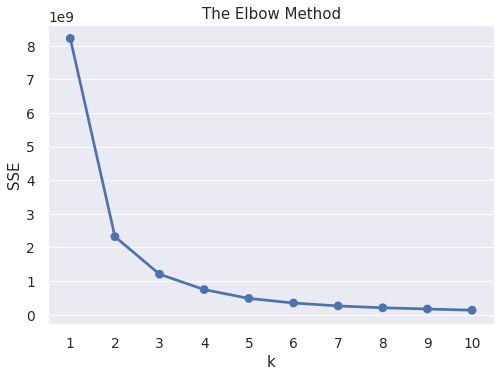

In [298]:
# Fit Kmeans and calculate SSE for each k value
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_k)
    sse[k] = kmeans.inertia_ # sum of squared distances to the closest cluster centers
  
# plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The statistical results of each cluster are as follows.

In [299]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_k)
cluster_labels = kmeans.labels_
df_k3 = df_k.assign(cluster=cluster_labels)
df_k3.shape
df_k3.cluster.value_counts()

0    10989
2     1179
1      409
Name: cluster, dtype: int64

We can check whether there is any spatial pattern in the clusters on the map below. The distribution of black clusters is relatively concentrated (in the city and Shijingshan District). The distribution of green and gray clusters is relatively scattered. The clusters did not appear to be separated from each other in terms of region, but the regions showed different aggregation proportions.

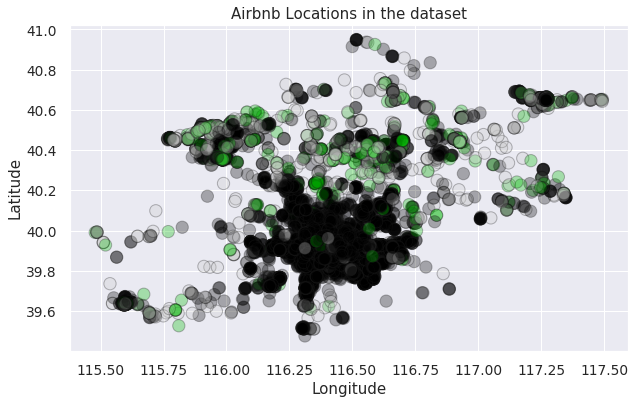

In [300]:
df_k3_merge = pd.merge(df_all, df_k3['cluster'], left_index=True, right_index=True, how='left')
df_k3_merge['cluster'] = df_k3_merge['cluster'].astype('object')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=df_k3_merge['longitude'], y=df_k3_merge['latitude'], c=df_k3_merge['cluster'], edgecolor='k', alpha=.3, s=150,cmap='nipy_spectral')
ax.set_title('Airbnb Locations in the dataset')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

The figure below shows the proportion of Airbnb listings in each cluster in each region. It can be seen that the distribution of the three types of Airbnb in the Huairou district is relatively even. Almost only one cluster of houses exists (Fengtai, Chaoyang, Haidian, Shijingshan, Tongzhou).

Text(0.5, 1.0, 'District typology based on Airbnb feature')

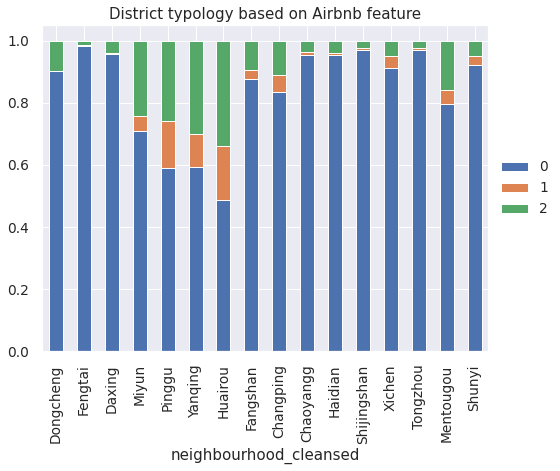

In [301]:
nb_dist = df_k3_merge[['neighbourhood_cleansed', 'price', 'cluster']].groupby(['cluster', 'neighbourhood_cleansed']).count().reset_index().pivot(index='neighbourhood_cleansed', columns='cluster' ,values='price').fillna(0)
nb_dist= nb_dist.rename(index={'东城区': 'Dongcheng','丰台区 / Fengtai':'Fengtai','大兴区 / Daxing':'Daxing','密云县 / Miyun':'Miyun',
                               '平谷区 / Pinggu':'Pinggu','延庆县 / Yanqing':'Yanqing','怀柔区 / Huairou':'Huairou','房山区':'Fangshan',
                               '昌平区':'Changping','朝阳区 / Chaoyang':'Chaoyangg','海淀区':'Haidian','石景山区':'Shijingshan',
                               '西城区':'Xichen','通州区 / Tongzhou':'Tongzhou','门头沟区 / Mentougou':'Mentougou','顺义区 / Shunyi':'Shunyi'})
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()
nb_sum = nb_dist[0] + nb_dist[1] + nb_dist[2] 
nb_dist.div(nb_sum, axis=0).plot(kind='bar', stacked=True, ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('District typology based on Airbnb feature')

The following table shows the average value of each variable based on the cluster label.

> **Cluster 0**：The average privacy is low; that is, many rooms are not entire houses. The number of bathrooms and bedrooms is small, 1-2 on average, which means that the house's total area is small. The popularity is high, and there are many comments. Such houses are mainly distributed indoors, which are in line with people's common travel purposes.

> **Cluster 1**：The average space is the largest, and the average house price is the highest. There are fewer rentals and the highest average score. This type of house is generally used for multi-person travel purposes, mainly in the suburbs.


> **Cluster 2**：The average house size is medium, suitable for a few people to live in, and the average house price is relatively high. The suburbs account for a higher proportion. Besides, the city center is also distributed. For example, Dongchen and Xichen may be medium-sized houses of good quality.




In [302]:
df_k3.groupby('cluster').mean()

room_type  bathrooms_text  bedrooms        price  number_of_reviews  \
cluster                                                                        
0         1.584585        1.205615  1.342069   391.649559          11.433342   
1         1.889976        3.867971  4.503667  4008.535452           5.254279   
2         1.839695        2.546226  3.286684  1838.698897           6.784563   

         review_scores_rating         0         1         2  
cluster                                                      
0                   94.595414 -0.052063 -0.077246 -0.021993  
1                   96.936430  0.513677  0.573746  0.246972  
2                   96.543681  0.307061  0.520941  0.119313

Suppose customers want to find a house similar to the target house in the Mentougou area. Visualize each Airbnb listing on the map and color-code them according to the assigned clusters. They can choose from the picture below. When clicking the mark, a message pops up, including location, price, name, etc.

In [303]:
df_k3_geo = geopandas.GeoDataFrame(df_k3_merge, geometry=geopandas.points_from_xy(df_k3_merge.longitude,
                                                                            df_k3_merge.latitude))
chaoyang = nbhoods[nbhoods.neighbourhood == '门头沟区 / Mentougou'].geometry
df_show =df_k3_geo[(df_k3_geo.neighbourhood_cleansed == '门头沟区 / Mentougou') ]
m = folium.Map(location=[40, 115.75], zoom_start=10.4)
folium.GeoJson(chaoyang).add_to(m)
for row in df_show.iterrows():
    row_values = row[1]
    center_point = row_values['geometry']
    location = [center_point.y, center_point.x]
    if row_values['cluster'] == 0:
        marker_color = 'lightred'
    elif row_values['cluster'] == 1:
        marker_color = 'cadetblue'
    else:
        marker_color = 'lightgreen'
    popup = ('NAME: ' + str(row_values['name']) +
             '  ' + 'PRICE: $' + str(row_values['price']))
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color=marker_color, icon='home'))
    marker.add_to(m)
display(m)

## 6. Evaluation


Contour analysis can be used to evaluate the density and spacing between clusters. The score is calculated by averaging each sample's contour coefficient, which is calculated as the difference between the average intra-cluster distance and the average closest cluster distance of each sample and is normalized by the maximum value. This will produce a score between -1 and +1. A score close to +1 indicates a higher degree of separation, and a score close to -1 indicates the sample may have been assigned to the wrong cluster. SilhouetteVisualizer displays each sample's contour coefficient on a per-cluster basis, allowing users to visualize the density and separation of the clusters. The vertical red dotted line in the figure represents the average contour score of all observations.

The image below shows a more extended profile, but it is not even enough, so the next step will be to try other values of k. The other possible reason is that the data set itself mainly belongs to a cluster, and the distribution can be examined under this type.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f13917c90>,
                     model=None)

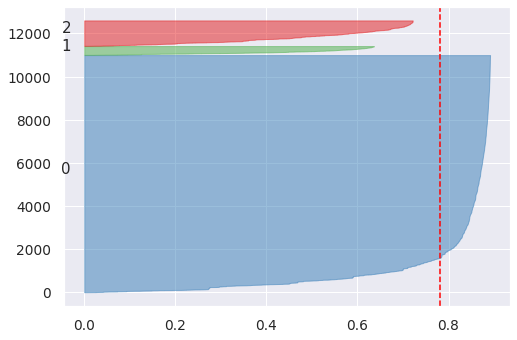

In [304]:
# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_k3)

## 7. Conclusion
In total, Airbnb listings are mainly distributed in the city center, and there are also clusters of scenic spots in a few suburbs, which is consistent with the results of previous research. Also, the relatively high average housing prices in several suburbs in the north and east of Beijing may be due to the large proportion of large houses that can accommodate many people. In the city center, the average house price is also higher in areas such as Dongchen and Xichen. It is worth noting that the average house price in the Haidian District, which has many scenic spots and is located in the urban area, is relatively low, and the reasons remain to be discovered. 

As for the relationship between house characteristics, there is a strong correlation between house types and facilities and house prices, and the number of rooms.

Besides, the proportions of houses in different clusters in different districts are quite different, which may be related to travelers' travel purpose, the local landscape, and the degree of convenience.




---


**Reference**

AITCHISON, J., 1983. Principal component analysis of compositional data. Biometrika, 70(1), pp.57-65.

Aldenderfer, M. S. and Blashfield, R. K., 1984. Cluster Analysis, Beverly Hills: SAGE Publications Ltd

Grus, J. 2016, K-means and hierarchical clustering with Python, O'Reilly Media, Inc.

Perez-Sanchez, V., Serrano-Estrada, L., Marti, P. and Mora-Garcia, R., 2018. The What, Where, and Why of Airbnb Price Determinants. Sustainability, 10(12), p.4596.

Quattrone, G., Greatorex, A., Quercia, D., Capra, L. and Musolesi, M., 2018. Analyzing and predicting the spatial penetration of Airbnb in U.S. cities. EPJ Data Science, 7(1).

Adamiak, C., Szyda, B., Dubownik, A. and García-Álvarez, D., 2019. Airbnb Offer in Spain—Spatial Analysis of the Pattern and Determinants of Its Distribution. ISPRS International Journal of Geo-Information, 8(3), p.155.

Gutiérrez, J., García-Palomares, J., Romanillos, G. and Salas-Olmedo, M., 2017. The eruption of Airbnb in tourist cities: Comparing spatial patterns of hotels and peer-to-peer accommodation in Barcelona. Tourism Management, 62, pp.278-291.

Castles, F. and Obinger, H., 2008. Worlds, Families, Regimes: Country Clusters in European and OECD Area Public Policy. West European Politics, 31(1-2), pp.321-344.

Gould, A., Apparicio, P. and Cloutier, M., 2012. Classifying Neighbourhoods by Level of Access to Stores Selling Fresh Fruit and Vegetables and Groceries: Identifying Problematic Areas in the City of Gatineau, Quebec. Canadian Journal of Public Health, 103(6), pp.e433-e437.

Laudani, L., Vannozzi, G., Sawacha, Z., della Croce, U., Cereatti, A. and Macaluso, A., 2013. Association between Physical Activity Levels and Physiological Factors Underlying Mobility in Young, Middle-Aged and Older Individuals Living in a City District. PLoS ONE, 8(9), p.e74227.

## Word


In [1]:
import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code
            print("{} Words in notebooks' markdown" .format(word_count_markdown))
            print("{} Words in notebooks' heading" .format(word_count_heading))
            print("{} Words in notebooks' code" .format(word_count_code))


/Users/hanchangyu/opt/anaconda3/lib/python3.8/site-packages/nbformat/current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


./2604299_URBAN5123.ipynb
2926 Words in notebooks' markdown
26 Words in notebooks' heading
2662 Words in notebooks' code
